# Python: risk adjustment

In this notebook we show how risk adjustment helps to increase efficiency in a health insurance market.

First, we import some libraries:

In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

There are two types of agents: agents with high (low) expected health care costs $\theta^h(\theta^l)$ where $\theta^i$ denotes the expected costs of agent $i \in \{l,h\}$. The fraction of $\theta^h$ agents is given by $\phi \in [0,1]$.

When an agent buys health insurance, he buys a fraction $q \in [0,1]$ of the costs that will be covered by the insurer. Hence, his expected costs equal $(1-q)\theta$. The variance of costs is given by $\sigma^2$ for both types; hence after buying insurance, the variance is given by $(1-q)^2 \sigma^2$.

Assume agents have mean-variance utility:

$$
u = w - p - (1-q)\theta - 0.5 \rho (1-q)^2 \sigma^2
$$

where $w$ denotes the agent's wealth (same for both types), $p$ the insurance premium and $\rho>0$ measures the agent's risk aversion. With $\rho =0$, the agent is risk neutral and there is no reason to buy insurance.

We assume perfect competition in the health insurance market; where we use the perfect competition definition by Rothschild and Stiglitz. In our context that implies that the insurance premium equals the expected cost for the insurer. Hence, a contract $q^i$ at price $p^i$ sold to type $\theta^i$ only satisfies $p^i = q^i \theta^i$.

If a contract $p,q$ is sold to both types (pooling contract), we have $p = q(\phi \theta^h + (1-\phi)\theta^l)$.

Risk adjustment is a subsidy paid by the payer (say, the government) to an insurer with a high cost customer. In particular, the government pays an insurer $r^h = r$ for each $\theta^h$ customer that the insurer has. We normalize the risk adjustment budget here at 0: $\phi r^h + (1-\phi)r^l =0$. With $r^h =r$, it follows that

$$
r^l = -\frac{\phi}{1-\phi} r
$$

Hence, the expressions with $r$ in the functions `p_low` and `p_high` below.

* Why is there no $r$ in the function `p_pooled`?


In [2]:
w = 1.0
rho = 1.0
sigma = 1.0
phi = 0.5
theta_h = 2.0
theta_l = 1.0
range_q = arange(0.0,1.01,0.01)

def u(q,p,theta):
    return w - p - (1-q)*theta - 0.5*rho*(1-q)**2*sigma**2

def p_low(q,r):
    return (theta_l+phi/(1-phi)*r)*q

def p_high(q,r):
    return (theta_h-r)*q

def p_pooled(q):
    return (phi*theta_h+(1-phi)*theta_l)*q


An indifference curve in $(q,p)$ space is defined as $u(q,p) = \bar u$ for some $\bar u >0$. Because of the mean variance utility, we can write an indifference curce as

$$
p = u(q,0) - \bar u
$$

In [3]:
def indifference_curve(utility,theta):
    vector = [max(0,u(q,0,theta)-utility) for q in range_q]
    return vector

## no pooling equilibrium

Ideally, both types are pooled on a full insurance contract. As both types are risk averse and insurers are risk neutral, $q=1$ is efficient from a social point of view. With second degree price discrimination, there cannot be two contracts with $q=1$: indeed, both types would buy the cheapest contract (only). 

Hence, the efficient contract with $q=1$ for both types must be a pooling contract with $p = \phi \theta^h +(1-\phi) \theta^l$. 

So the question is: is there an equilibrium where all insurers offer $q=1$ at pemium $p = \phi \theta^h +(1-\phi) \theta^l$? If such an equilibrium exists, the situation is as drawn in the figure below.

This figure plots the pooling price $p = q(\phi \theta^h +(1-\phi) \theta^l)$ and the costs of offering a contract aimed at low types only: $p^l = q \theta^l$. Further, the (blue) indifference curves are drawn for both types; indifference curves that go thorugh the pooling contract.

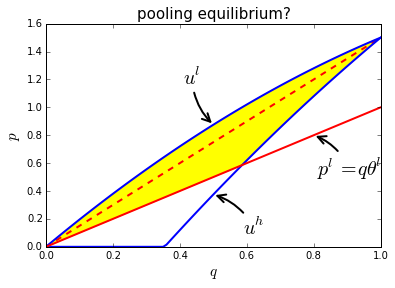

In [56]:
r = 0.0
range_p_high = [p_high(q,r) for q in range_q]
range_p_low = [p_low(q,r) for q in range_q]
range_p_pooled = [p_pooled(q) for q in range_q]

plt.clf()
plt.plot(range_q, range_p_pooled,'--', color = 'r', linewidth = 2)
plt.plot(range_q, indifference_curve(u(1,p_pooled(1),theta_h),theta_h),'-', color = 'b', linewidth = 2)
plt.plot(range_q, indifference_curve(u(1,p_pooled(1),theta_l),theta_l),'-', color = 'b', linewidth = 2)
plt.plot(range_q, range_p_low,'-', color = 'r', linewidth = 2)

lower_bound = [max(p_low(q,r),u(q,0,theta_h)-u(1,p_pooled(1),theta_h)) for q in range_q]
plt.fill_between(range_q,lower_bound, indifference_curve(u(1,p_pooled(1),theta_l),theta_l),color='yellow')

plt.annotate('$u^l$', xy=(0.5,u(0.5,0,theta_l)-u(1,p_pooled(1),theta_l)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(-30, 40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )

plt.annotate('$p^l=q\\theta^l$', xy=(0.8,p_low(0.8,r)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(3, -40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$u^h$', xy=(0.5,u(0.5,0,theta_h)-u(1,p_pooled(1),theta_h)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, -40), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )



plt.title("pooling equilibrium?",fontsize = 15)
plt.xlabel("$q$",fontsize = 15)
plt.ylabel("$p$",fontsize = 15,rotation = 90)
# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('RS_equil_pooling.png')

The yellow area in the figure has the following characteristics:

* lies below indifference curve $u^l$: the points in the yellow area are strictly prefered by $\theta^l$ above the pooling contract;
* lies above indifference curve $u^h$: $\theta^h$ strictly prefers the pooling contract above the points in the yellow area
* lies above $p^l = q \theta^l$: an insurer offering a contract in the yellow area attracts low types only and makes a strictly positive profit on such a contract.

As there is a profitable deviating offer, the pooling contract cannot be a perfectly competitive equilibrium outcome.

* Can you redraw the figure with a pooling contract at some $q<1$? 
* Can such a pooling contract be sustained as equilibrium?

## Rothschild and Stiglitz equilbrium without risk adjustment

The following figure illustrates the Rothschild and Stiglitz equilibrium. As shown in the lecture, in such an equilibrium we have $q^h =1$: high cost type gets efficient insurance at a price equal to expected costs $p= \theta^h$. 

The $\theta^l$ contract needs to be chosen such that $\theta^h$ does not buy this contract. Further, insurers cannot make a profit on this contract (under perfect competition). Hence the contract is determined by the intersection of:

* $u^h$ indifference curve through the $\theta^h$ contract: $\theta^h$ is indifferent between the contracts and buys the $\theta^h$ contract
* $p^l = q \theta^l$: insurer makes zero profits on $\theta^l$ contract.

The function `q_RS` finds this intersection point as a function of risk adjustment $r$. First, we consider $r=0$.

In [4]:
def q_RS(r):
    solution = optimize.root(lambda x, r = r: u(x,p_low(x,r),theta_h)-u(1,p_high(1,r),theta_h), 0.5, args=(), method='hybr', jac=None, tol=10**(-10), callback=None, options=None)
    return solution.x[0]

low type gets q =  0.267949192431


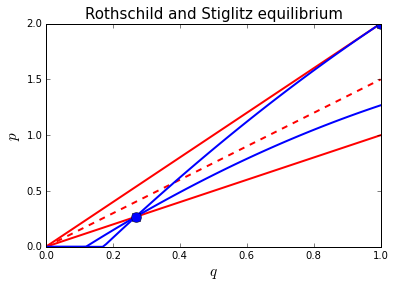

In [5]:
r = 0.0
range_p_high = [p_high(q,r) for q in range_q]
range_p_low = [p_low(q,r) for q in range_q]
range_p_pooled = [p_pooled(q) for q in range_q]

plt.clf()
plt.plot(range_q, range_p_high,'-', color = 'r', linewidth = 2)
plt.plot(range_q, range_p_pooled,'--', color = 'r', linewidth = 2)
plt.plot(range_q, range_p_low,'-', color = 'r', linewidth = 2)
plt.plot(range_q, indifference_curve(u(1,p_high(1,r),theta_h),theta_h),'-', color = 'b', linewidth = 2)
plt.plot(range_q, indifference_curve(u(q_RS(r),p_low(q_RS(r),r),theta_l),theta_l),'-', color = 'b', linewidth = 2)

contract_h = plt.plot(1.0,p_high(1,r), 'ro') # 
plt.setp(contract_h, 'markersize', 10)      
plt.setp(contract_h, 'markerfacecolor', 'b')
contract_l = plt.plot(q_RS(r),p_low(q_RS(r),r), 'ro') # 
plt.setp(contract_l, 'markersize', 10)           
plt.setp(contract_l, 'markerfacecolor', 'b')



plt.title("Rothschild and Stiglitz equilibrium",fontsize = 15)
plt.xlabel("$q$",fontsize = 15)
plt.ylabel("$p$",fontsize = 15,rotation = 90)
# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('RS_equil.png')

print "low type gets q = ", q_RS(r)

The figure uses two blue dots to illustrate the equilibrium contracts: 

* at the top right corner, the contract for $\theta^h$ with $q=1.0$ and $p=\theta^h = 2.0$;
* close to the corner at the left bottom, the $\theta^l$ contract with $q^l$ close to 0.27.

As $q^l < 1$ and low types are risk averse, this contract is inefficient.

## risk adjustment

Now suppose that the government introduces risk adjustment: $r > 0$. This implies the following changes:

* $p^h$ falls to $p^h = \theta^h -r$
* hence the $u^h$ indifference curve through the efficient contract ($q^h=1,p^h=\theta^h-r$) shifts downwards
* the zero profit line for the low type $p^l = q(\theta^l + \phi/(1-\phi) r)$ rotates upwards with $r$

The last two effects raise the $q$ at which $p^l$ and indifference curve $u^h$ intersect. With $r=0.3$ we find $q^l = 0.56$ which is double the value for $q^l$ with $r=0.0$. Hence, efficiency increases with risk adjustment.

low type gets q =  0.56421833084


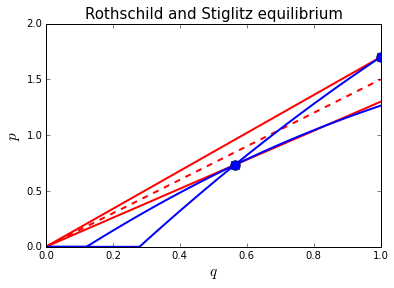

In [42]:
r = 0.3
range_p_high = [p_high(q,r) for q in range_q]
range_p_low = [p_low(q,r) for q in range_q]
range_p_pooled = [p_pooled(q) for q in range_q]

plt.clf()
plt.plot(range_q, range_p_high,'-', color = 'r', linewidth = 2)
plt.plot(range_q, range_p_low,'-', color = 'r', linewidth = 2)
plt.plot(range_q, range_p_pooled,'--', color = 'r', linewidth = 2)
plt.plot(range_q, indifference_curve(u(1,p_high(1,r),theta_h),theta_h),'-', color = 'b', linewidth = 2)
plt.plot(range_q, indifference_curve(u(q_RS(r),p_low(q_RS(r),r),theta_l),theta_l),'-', color = 'b', linewidth = 2)

contract_h = plt.plot(1.0,p_high(1,r), 'ro') # 
plt.setp(contract_h, 'markersize', 10)      
plt.setp(contract_h, 'markerfacecolor', 'b')
contract_l = plt.plot(q_RS(r),p_low(q_RS(r),r), 'ro') # 
plt.setp(contract_l, 'markersize', 10)           
plt.setp(contract_l, 'markerfacecolor', 'b')



plt.title("Rothschild and Stiglitz equilibrium",fontsize = 15)
plt.xlabel("$q$",fontsize = 15)
plt.ylabel("$p$",fontsize = 15,rotation = 90)
# plt.xlim(c,1.0)
plt.ylim(0.0,2.0)
plt.savefig('RS_equil_ra.png')

print "low type gets q = ", q_RS(r)

As can be seen in the figure, there are two opposing effects on the utility for $\theta^l$:

* $q^l$ increases which raises the utility for $\theta^l$
* $p^l$ increases due to $r > 0$; risk adjustment is a cross subsidy from low to high types

The overall effect on $\theta^l$'s utility is ambiguous. 

* Calculate and compare the utility for $\theta^l$ with $r=0.0$ and $r=3.0$; does $\theta^l$ gain from risk adjustment in this example?

## intuition

The inefficiency in the equilibrium above is due to insurers' incentive to "cherry pick" low cost types. Insurers want to select low cost types and charge a high price to high cost types. These selection incentives cause the inefficiency: $q^l < 1$ to separate low from high types.

As risk adjustment is introduced, the difference in (overall) expected costs between types for insurers is reduced. Due to the cross subsidy, high types are not so expensive anymore; nor are low types still so cheap to serve.

As selection incentives are reduced, so is the inefficiency necessary to induce the separation.

* What value $r^*$ would implement the efficient outcome ($q=1$) for both types?
* What happens if $r>r^*$? Simply try in the notebook and explain the outcome.